In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

os.chdir("C:\\Users\\Aditya Prakash\\Documents\supermarket_ML")

df = pd.read_csv("supermarket_sales.csv")
print(df)

C:\Users\Aditya Prakash\AppData\Local\Temp\ipykernel_10928\723361184.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [105]:
df2 = df

In [106]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [107]:
df.shape

(1000, 17)

In [108]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [110]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [111]:
df.insert(14,"cost_price",df.cogs)

In [112]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,cost_price,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,65.82,4.761905,3.2910,4.1


In [113]:
df = df2.drop(["cogs","gross margin percentage"], axis = 1)

In [114]:
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [115]:
np.unique(df.Branch)

array(['A', 'B', 'C'], dtype=object)

In [116]:
np.unique(df.City)

array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object)

In [117]:
np.unique(df["Customer type"])

array(['Member', 'Normal'], dtype=object)

In [118]:
np.unique(df["Product line"])

array(['Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'], dtype=object)

In [119]:
np.unique(df["Payment"])

array(['Cash', 'Credit card', 'Ewallet'], dtype=object)

In [120]:
df["Customer type"].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

Text(0.5, 1.0, 'Ratings by Branch')

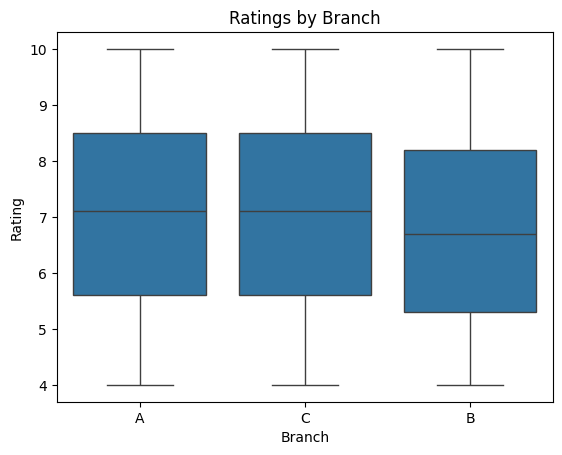

In [121]:
sns.boxplot(x='Branch',y='Rating',data=df).set_title("Ratings by Branch")

In [122]:
pd.crosstab(index = df["Product line"], columns = 'count')

col_0,count
Product line,
Electronic accessories,170
Fashion accessories,178
Food and beverages,174
Health and beauty,152
Home and lifestyle,160
Sports and travel,166


In [123]:
pd.crosstab(df["Product line"], df["Branch"])

Branch,A,B,C
Product line,,,
Electronic accessories,60,55,55
Fashion accessories,51,62,65
Food and beverages,58,50,66
Health and beauty,47,53,52
Home and lifestyle,65,50,45
Sports and travel,59,62,45


In [124]:
pd.crosstab(df["Product line"], df["Gender"])

Gender,Female,Male
Product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


In [125]:
categorical = df.select_dtypes(exclude = [object])

In [126]:
categorical.corr()

,Unit price,Quantity,Tax 5%,Total,cost_price,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cost_price,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


<Axes: xlabel='count', ylabel='Product line'>

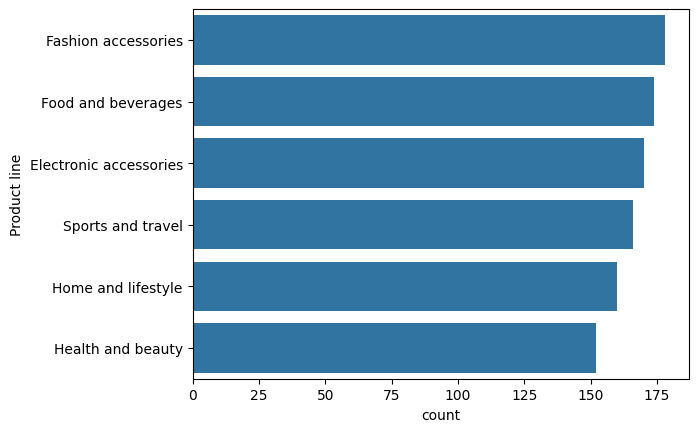

In [127]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )

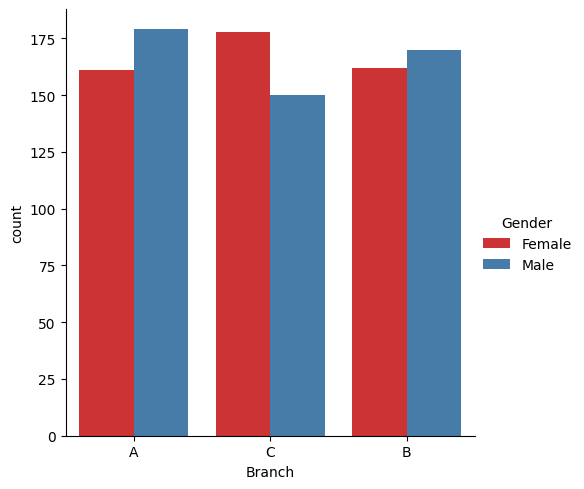

In [128]:
sns.catplot(data=df,x="Branch",hue="Gender",palette="Set1",kind="count")
plt.show()

In [129]:
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [130]:
dfA = df[df.Branch == 'A']
dfB = df[df.Branch == 'B']
dfC = df[df.Branch == 'C']

In [131]:
dfA

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost_price,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,14.1400,4.5
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,5.8030,8.8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1


In [132]:
dfA["Product line"].value_counts()

Product line
Home and lifestyle        65
Electronic accessories    60
Sports and travel         59
Food and beverages        58
Fashion accessories       51
Health and beauty         47
Name: count, dtype: int64

In [133]:
dfB["Product line"].value_counts()

Product line
Fashion accessories       62
Sports and travel         62
Electronic accessories    55
Health and beauty         53
Food and beverages        50
Home and lifestyle        50
Name: count, dtype: int64

In [134]:
dfC["Product line"].value_counts()

Product line
Food and beverages        66
Fashion accessories       65
Electronic accessories    55
Health and beauty         52
Home and lifestyle        45
Sports and travel         45
Name: count, dtype: int64

In [135]:
pd.crosstab(dfA["Product line"], dfA.Quantity)

Quantity,1,2,3,4,5,6,7,8,9,10
Product line,,,,,,,,,,
Electronic accessories,9,3,7,6,6,4,9,5,5,6
Fashion accessories,11,4,4,5,5,1,5,4,6,6
Food and beverages,3,6,8,4,11,8,5,3,4,6
Health and beauty,4,3,5,6,9,3,5,3,4,5
Home and lifestyle,5,6,5,9,4,11,3,8,8,6
Sports and travel,4,6,5,7,9,4,9,2,4,9


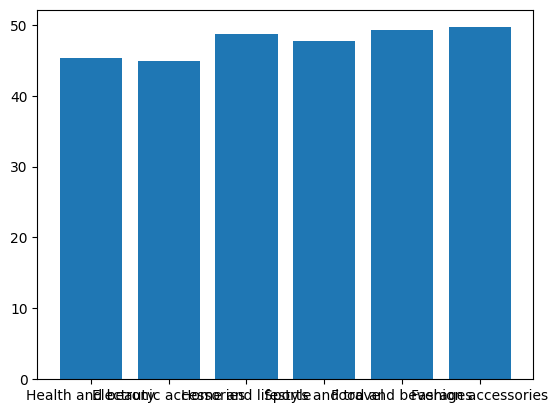

In [136]:
plt.bar(df["Product line"], df["gross income"])
plt.show()

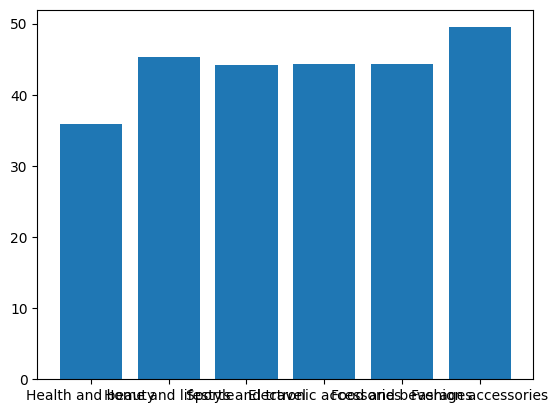

In [137]:
plt.bar(dfA["Product line"], dfA["gross income"])
plt.show()

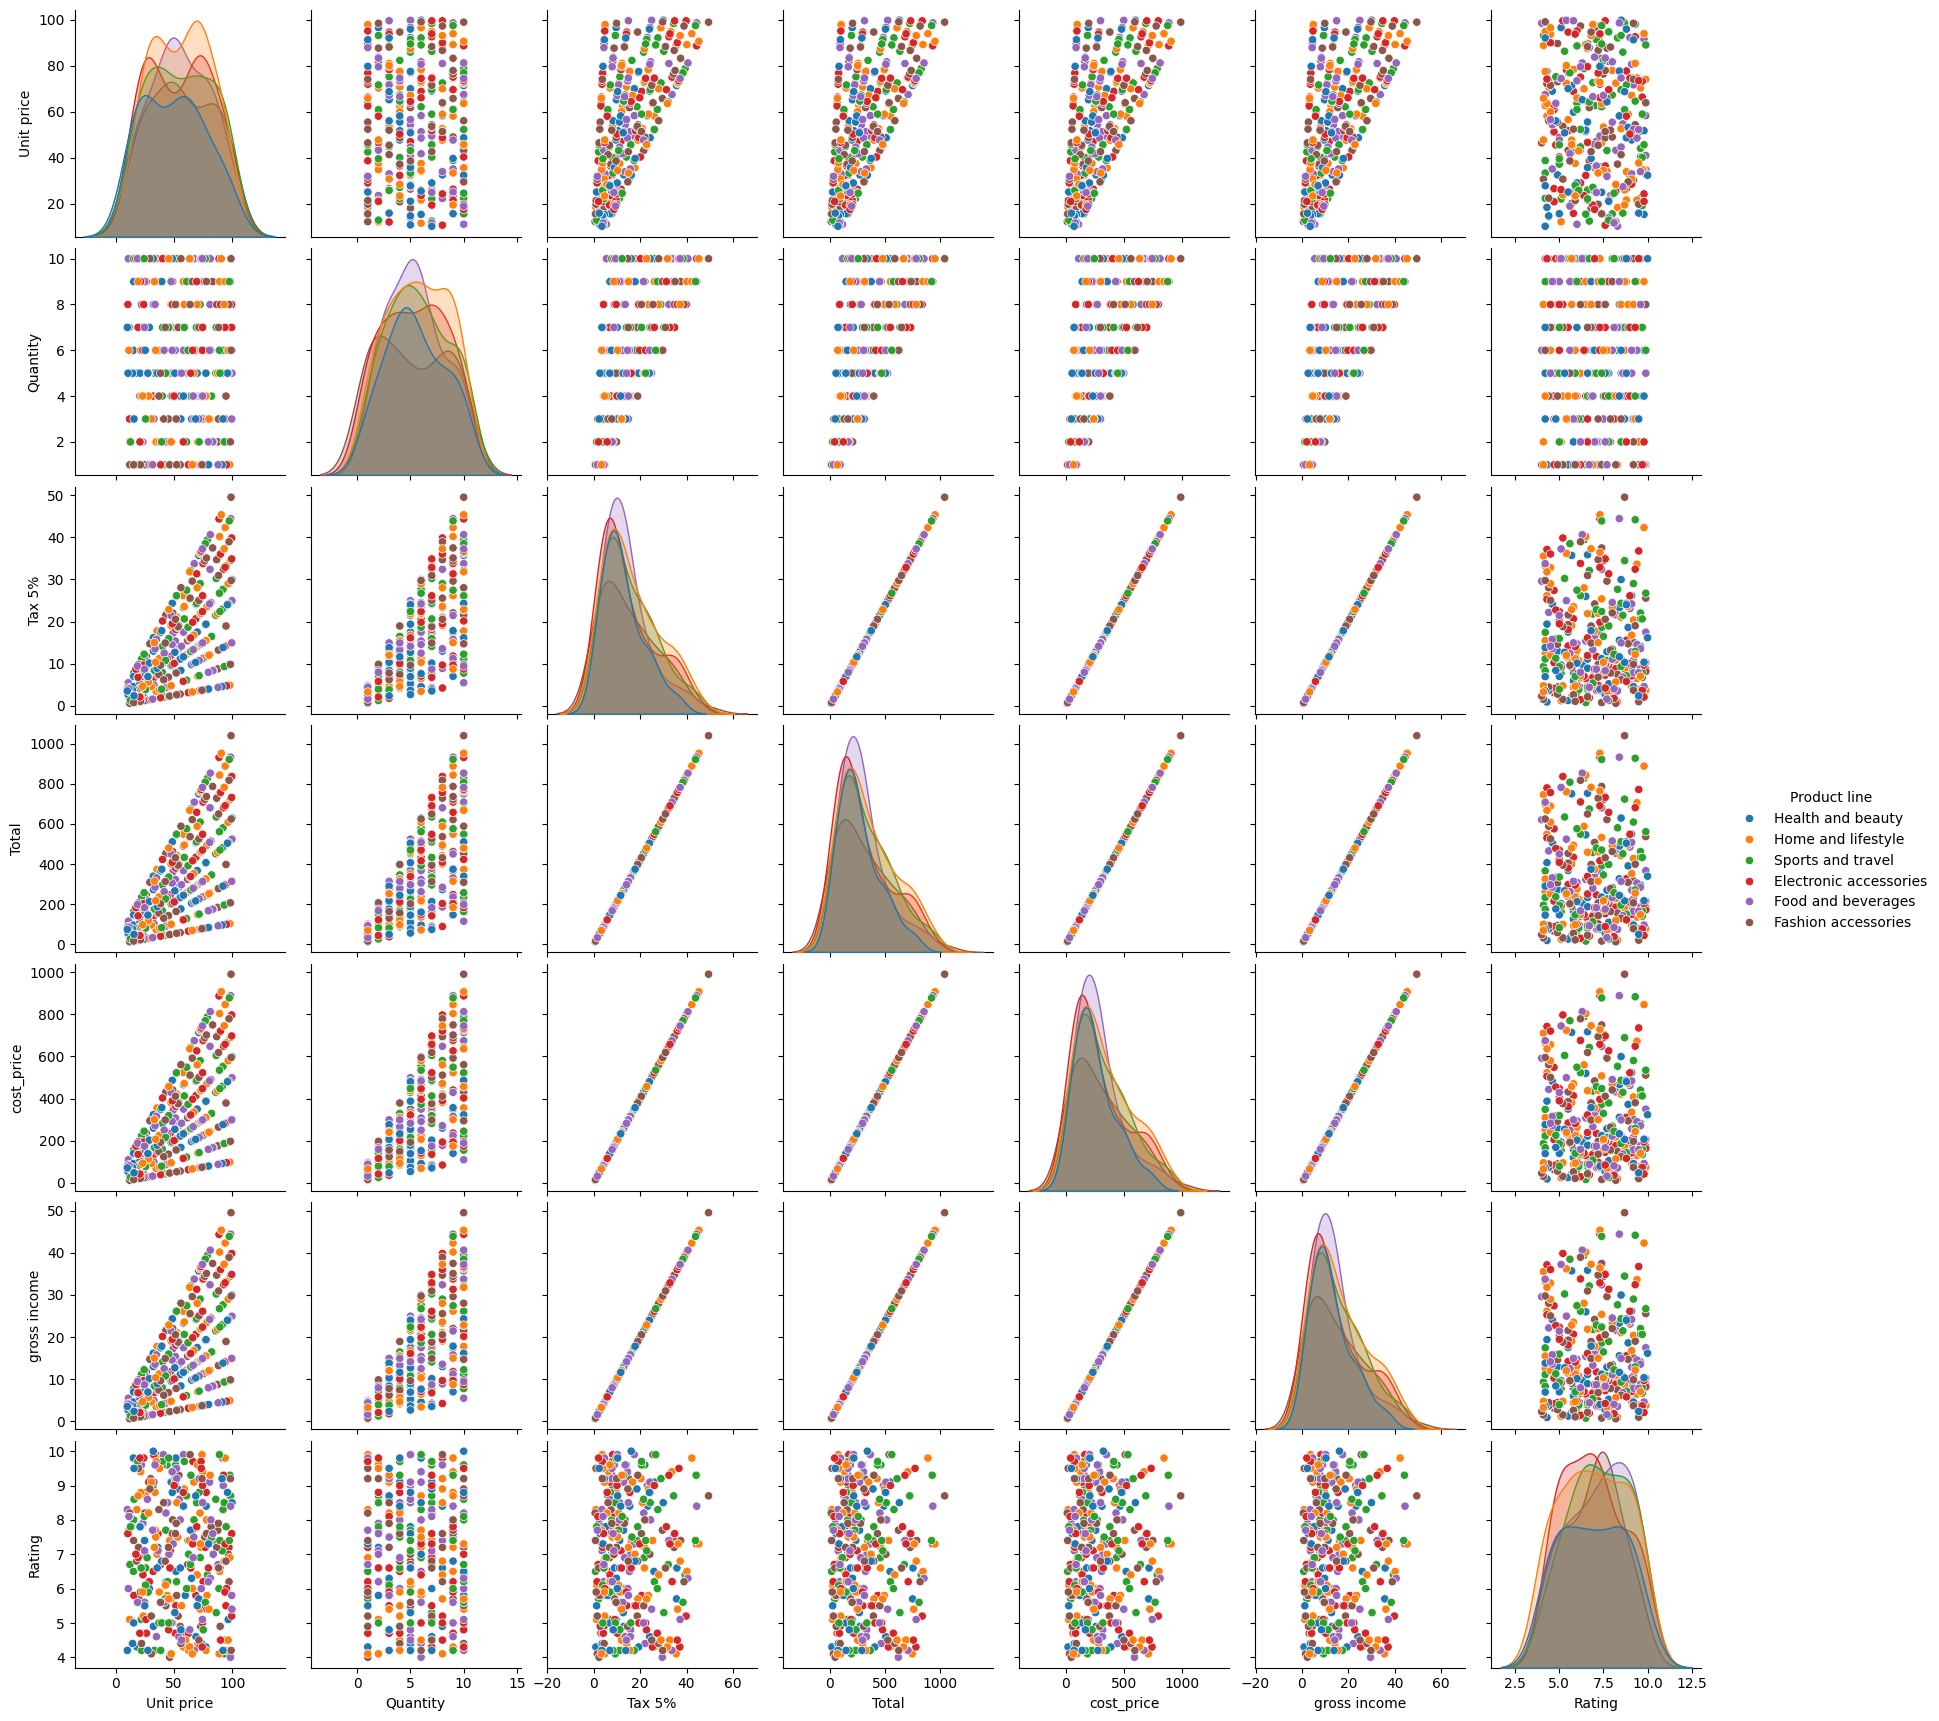

In [138]:
sns.pairplot(dfA, kind = "scatter", hue = "Product line")
plt.show()

In [139]:
dummies = pd.get_dummies(dfA["Product line"])
dfA = pd.concat([dfA, dummies], axis = 1)
dfA

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cost_price,gross income,Rating,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,26.1415,9.1,False,False,False,True,False,False
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,16.2155,7.4,False,False,False,False,True,False
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,23.2880,8.4,False,False,False,True,False,False
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,30.2085,5.3,False,False,False,False,False,True
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,...,Ewallet,413.04,20.6520,5.8,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,...,Credit card,282.80,14.1400,4.5,False,False,True,False,False,False
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,...,Ewallet,116.06,5.8030,8.8,True,False,False,False,False,False
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,Cash,31.84,1.5920,7.7,False,False,True,False,False,False
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,Cash,65.82,3.2910,4.1,False,False,False,False,True,False


In [140]:
dfA = dfA.drop(["Invoice ID","Branch","City","Sports and travel"], axis = 1)

In [141]:
dfA

,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost_price,gross income,Rating,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle
0,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,False,False,False,True,False
2,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,False,False,False,False,True
3,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,False,False,False,True,False
4,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,False,False,False,False,False
6,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,20.6520,5.8,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,14.1400,4.5,False,False,True,False,False
992,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,5.8030,8.8,True,False,False,False,False
997,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7,False,False,True,False,False
998,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1,False,False,False,False,True


In [142]:
lr = LinearRegression()
x = dummies.drop(["Sports and travel"], axis = 1)
x = x.values
y = dfA.Quantity.values
x
y

array([ 7,  7,  8,  7,  6,  2,  5, 10, 10,  7,  6,  3,  5,  3,  8,  2,  9,
        2,  5,  9,  5,  2,  8, 10, 10, 10, 10,  1,  9,  9,  7,  1,  7,  1,
        3,  6, 10,  6,  9, 10,  8,  7,  5,  6,  5,  6,  8,  6, 10,  8,  9,
        5,  1,  7, 10,  6,  7,  5,  9,  8,  6, 10,  7,  1,  5,  1,  9,  9,
        1,  3,  2,  8, 10,  2,  1,  9,  2,  4,  8,  5,  4,  4,  8,  1,  6,
        4,  9, 10,  7,  4, 10,  9,  2, 10,  8,  1,  6,  4,  7,  1,  2,  6,
        4,  4,  7,  7,  8,  3,  2,  5,  9,  6,  5,  6,  5,  4,  3,  5,  2,
        5,  9,  3,  9,  1,  7,  7,  8,  6,  4,  9,  5,  5,  4,  5, 10,  1,
       10,  1,  5,  5,  4,  5,  4,  5,  3,  8,  7,  7, 10,  6,  6,  9,  7,
        5,  1,  4,  5,  4, 10,  5,  3,  5,  1,  5,  4, 10,  8,  8,  5,  7,
        7,  2,  6,  6,  5,  9,  6,  8,  5,  1,  4,  3, 10,  9,  6,  7,  6,
        3,  6, 10,  9,  7,  5,  4,  4,  4,  3,  5,  5,  1,  3,  3,  2,  7,
        1,  1, 10,  9,  6,  3,  1,  2,  3,  1, 10,  3,  2,  7,  9, 10,  3,
        3,  5,  1,  4, 10

In [143]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [144]:
lr.fit(train_x,train_y)

LinearRegression()

In [145]:
lr.coef_

array([-0.09585933, -0.18488372, -0.21781055,  0.42807924,  0.68250758])

In [146]:
lr.intercept_

5.5348837209302335

In [147]:
prediction = lr.predict(test_x)

In [148]:
prediction

array([5.35      , 5.43902439, 5.35      , 6.2173913 , 6.2173913 ,
       5.96296296, 5.35      , 5.43902439, 5.43902439, 5.35      ,
       5.43902439, 6.2173913 , 6.2173913 , 5.31707317, 5.96296296,
       5.53488372, 5.53488372, 5.53488372, 6.2173913 , 5.53488372,
       5.31707317, 5.53488372, 6.2173913 , 5.31707317, 5.31707317,
       5.35      , 5.35      , 5.96296296, 5.53488372, 5.31707317,
       5.96296296, 5.43902439, 6.2173913 , 5.31707317, 5.53488372,
       5.31707317, 6.2173913 , 6.2173913 , 5.53488372, 5.96296296,
       5.43902439, 5.53488372, 5.31707317, 5.53488372, 5.31707317,
       5.31707317, 5.53488372, 6.2173913 , 6.2173913 , 6.2173913 ,
       5.96296296, 5.35      , 5.53488372, 5.96296296, 5.43902439,
       5.96296296, 5.53488372, 6.2173913 , 5.31707317, 5.43902439,
       5.43902439, 6.2173913 , 5.96296296, 5.43902439, 6.2173913 ,
       5.96296296, 5.96296296, 5.31707317, 5.43902439, 5.96296296,
       5.43902439, 5.96296296, 6.2173913 , 5.96296296, 5.43902

In [152]:
dfA["Product line"].value_counts()

Product line
Home and lifestyle        65
Electronic accessories    60
Sports and travel         59
Food and beverages        58
Fashion accessories       51
Health and beauty         47
Name: count, dtype: int64